# Test 3 : compare no sigmut, only sigmut, and biomarkers + sigmut
Here, we compare, for GCN classifier with Tumour type pre-graph, the case where we use no mutational signatures, only mutational signatures, and the combination of mutational signatures and biomarkers. No normalization of mutational signatures.

## Table of contents

1. [No sigmut](#1-no-sigmut)
2. [Only sigmut](#2-only-sigmut)
2. [Sigmut + biomarkers](#2-not-normalized-sigmut)
4. [Evaluate performances](#4-performances)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from evaluation.ClassificationMetrics import ClassificationMetrics

from manage.GCNClassifierTrainTestManager import GCNClassifierTrainTestManager

from models.GCNClassifier import GCNClassifier

from sklearn.preprocessing import StandardScaler

from utils.preProcessing import preProcessing

## 1. No mutational signatures

In [2]:
# Reading
df_no_sigmut = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_no_sigmut = df_no_sigmut.loc[df_no_sigmut["Cohort"] == "Naive"]

# Drop NaN values
df_no_sigmut = preProcessing.delete_nan_values(df_no_sigmut)

# Drop censored patients (OS)
t = np.median(df_no_sigmut["Overall survival (days)"].to_numpy())
df_no_sigmut = preProcessing.drop_censored_patients(df_no_sigmut, "Alive_0","Overall survival (days)",t)

# Extract features and label
features_name_no_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]
label_name = "Clinical benefit"
X_no_sigmut = df_no_sigmut.loc[:,features_name_no_sigmut].to_numpy()
y_no_sigmut = np.where(df_no_sigmut[label_name]=="DCB",1,0)

# Normalize features
X_no_sigmut = preProcessing.normalize_data(X_no_sigmut)

1 patients censored deleted


In [3]:
# Build group (all in same group)
group_no_sigmut = df_no_sigmut["Tumour type"].to_numpy()

In [4]:
# Instanciate GCN classifier with its train test manager
gcn_clf_no_sigmut = GCNClassifier(len(features_name_no_sigmut))
gcn_manager_no_sigmut = GCNClassifierTrainTestManager(gcn_clf_no_sigmut)
n_epochs = 50

In [5]:
# Make the leave one out cross validation
scores_no_sigmut, classes_no_sigmut, train_loss_no_sigmut, val_loss_no_sigmut, std_train_loss_no_sigmut, std_val_loss_no_sigmut, params_conv_no_sigmut, params_fc_no_sigmut = gcn_manager_no_sigmut.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut, n_epochs, "euclidean",3)

## 2. Only sigmut

In [6]:
# Reading
df_only_sigmut = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_only_sigmut = df_only_sigmut.loc[df_only_sigmut["Cohort"] == "Naive"]

# Drop NaN values
df_only_sigmut = preProcessing.delete_nan_values(df_only_sigmut)

# Drop censored patients (OS)
t = np.median(df_only_sigmut["Overall survival (days)"].to_numpy())
df_only_sigmut = preProcessing.drop_censored_patients(df_only_sigmut, "Alive_0","Overall survival (days)",t)

# Extract features and label
features_name_only_sigmut = ["SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]
label_name = "Clinical benefit"
X_only_sigmut = df_only_sigmut.loc[:,features_name_only_sigmut].to_numpy()
y_only_sigmut = np.where(df_only_sigmut[label_name]=="DCB",1,0)

1 patients censored deleted


In [7]:
# Build group (all in same group)
group_only_sigmut = df_only_sigmut["Tumour type"].to_numpy()

In [8]:
# Instanciate GCN classifier with its train test manager
gcn_clf_only_sigmut = GCNClassifier(len(features_name_only_sigmut))
gcn_manager_only_sigmut = GCNClassifierTrainTestManager(gcn_clf_only_sigmut)

In [9]:
# Make the leave one out cross validation
scores_only_sigmut, classes_only_sigmut, train_loss_only_sigmut, val_loss_only_sigmut, std_train_loss_only_sigmut, std_val_loss_only_sigmut, params_conv_only_sigmut, params_fc_only_sigmut = gcn_manager_only_sigmut.leave_one_out_cross_validation(X_only_sigmut, y_only_sigmut, group_only_sigmut, n_epochs, "euclidean",3)

## 3. Biomarkers + sigmut

In [10]:
# Reading
df_comb = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_comb = df_comb.loc[df_comb["Cohort"] == "Naive"]

# Drop NaN values
df_comb = preProcessing.delete_nan_values(df_comb)

# Drop censored patients (OS)
t = np.median(df_comb["Overall survival (days)"].to_numpy())
df_comb = preProcessing.drop_censored_patients(df_comb, "Alive_0","Overall survival (days)",t)

# Select features
features_name_comb = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]
features_to_normalize = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]

# Normalize features except mutational signatures
df_comb.loc[:,features_to_normalize] = StandardScaler().fit_transform(df_comb.loc[:,features_to_normalize].to_numpy())

# Extract features
X_comb = df_comb.loc[:,features_name_comb].to_numpy()

# Numerize label
y_comb = np.where(df_comb[label_name]=="DCB",1,0)

1 patients censored deleted


In [11]:
# Build group (all in same group)
group_comb = df_comb["Tumour type"].to_numpy()

In [12]:
# Instanciate GCN classifier with its train test manager
gcn_clf_comb = GCNClassifier(len(features_name_comb))
gcn_manager_comb = GCNClassifierTrainTestManager(gcn_clf_comb)

In [13]:
# Make the leave one out cross validation
scores_comb, classes_comb, train_loss_comb, val_loss_comb, std_train_loss_comb, std_val_loss_comb, params_conv_comb, params_fc_comb = gcn_manager_comb.leave_one_out_cross_validation(X_comb, y_comb, group_comb, n_epochs, "euclidean",3)

## 4. Evaluate performances

### Precision, recall, F1-score

In [14]:
# No sigmut
pre_no_sigmut, rec_no_sigmut, f1_no_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, classes_no_sigmut)

# Only sigmut
pre_only_sigmut, rec_only_sigmut, f1_only_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_only_sigmut, classes_only_sigmut)

# Biomarkers + sigmut
pre_comb, rec_comb, f1_comb = ClassificationMetrics.eval_metrics_from_conf_matrix(y_comb, classes_comb)

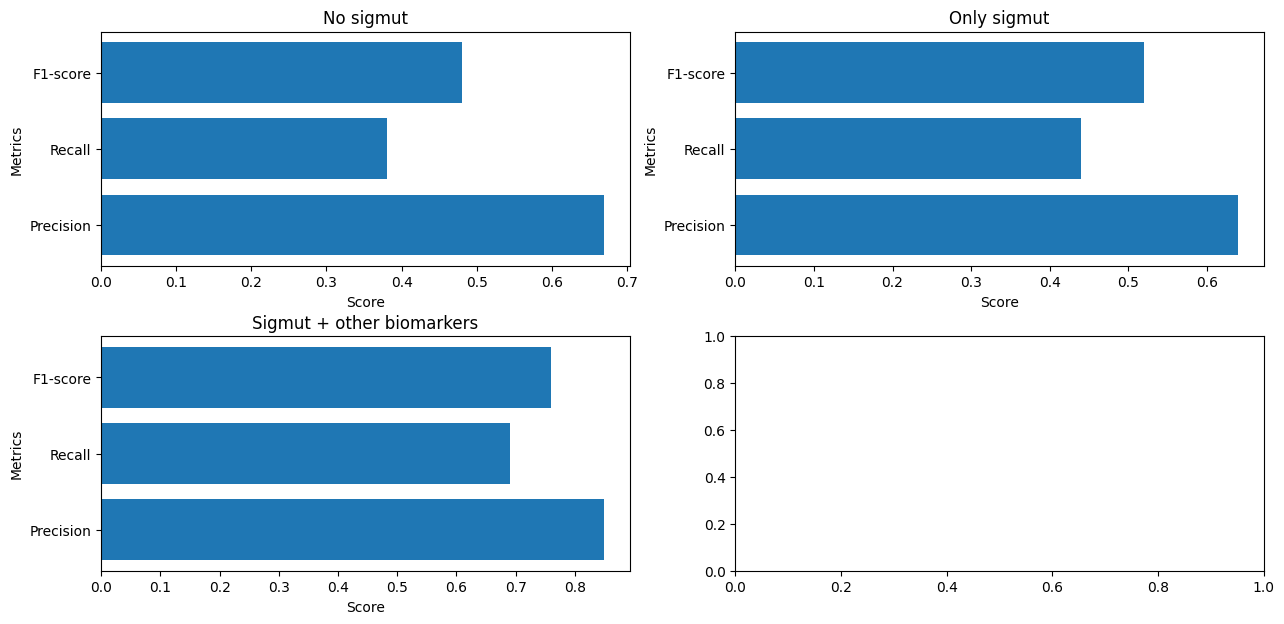

In [15]:
fig, ax = plt.subplots(2,2,figsize=(15,7))

ax[0,0].barh(["Precision","Recall","F1-score"],[pre_no_sigmut, rec_no_sigmut, f1_no_sigmut])
ax[0,0].set_xlabel("Score")
ax[0,0].set_ylabel("Metrics")
ax[0,0].set_title("No sigmut")

ax[0,1].barh(["Precision","Recall","F1-score"],[pre_only_sigmut, rec_only_sigmut, f1_only_sigmut])
ax[0,1].set_xlabel("Score")
ax[0,1].set_ylabel("Metrics")
ax[0,1].set_title("Only sigmut")

ax[1,0].barh(["Precision","Recall","F1-score"],[pre_comb, rec_comb, f1_comb])
ax[1,0].set_xlabel("Score")
ax[1,0].set_ylabel("Metrics")
ax[1,0].set_title("Sigmut + other biomarkers")

plt.subplots_adjust(hspace=0.3)

### ROC curve and AUC

In [16]:
# No sigmut
fpr_no_sigmut, tpr_no_sigmut, thresholds_no_sigmut = ClassificationMetrics.compute_roc_curve(y_no_sigmut, scores_no_sigmut)
auc_no_sigmut = ClassificationMetrics.compute_auc(y_no_sigmut, scores_no_sigmut)

# Only sigmut
fpr_only_sigmut, tpr_only_sigmut, thresholds_only_sigmut = ClassificationMetrics.compute_roc_curve(y_only_sigmut, scores_only_sigmut)
auc_only_sigmut = ClassificationMetrics.compute_auc(y_only_sigmut, scores_only_sigmut)

# Sigmut + other biomarkers
fpr_comb, tpr_comb, thresholds_comb = ClassificationMetrics.compute_roc_curve(y_comb, scores_comb)
auc_comb = ClassificationMetrics.compute_auc(y_comb, scores_comb)

Text(0, 0.6, 'AUC sigmut + other biomarkers : 0.96')

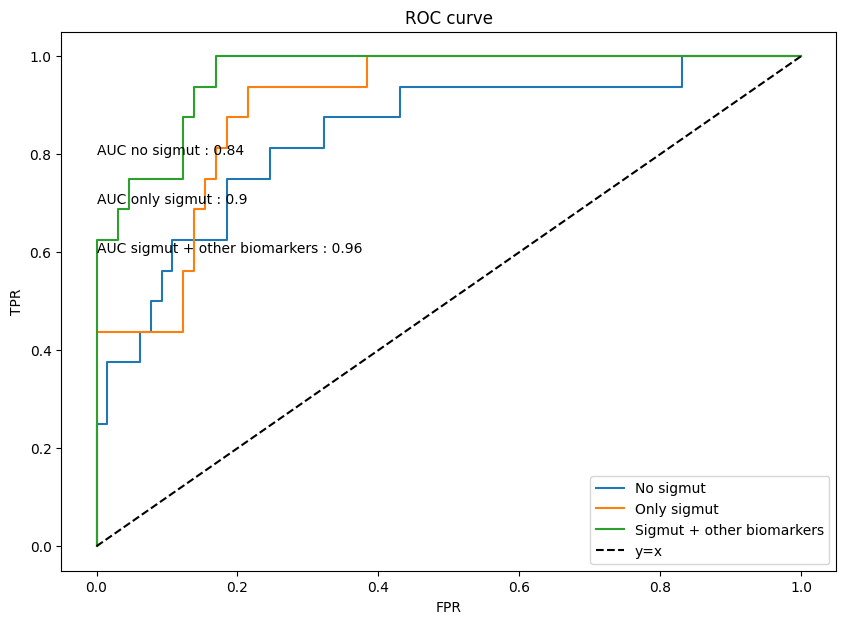

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
x = np.linspace(0,1,100)

ax.plot(fpr_no_sigmut, tpr_no_sigmut, label='No sigmut')
ax.plot(fpr_only_sigmut, tpr_only_sigmut, label='Only sigmut')
ax.plot(fpr_comb, tpr_comb, label='Sigmut + other biomarkers')
ax.plot(x,x,linestyle='--',color='black',label='y=x')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve')
ax.legend()
ax.text(0,0.8,f"AUC no sigmut : {auc_no_sigmut}")
ax.text(0,0.7,f"AUC only sigmut : {auc_only_sigmut}")
ax.text(0,0.6,f"AUC sigmut + other biomarkers : {auc_comb}")

### Train loss and validation loss

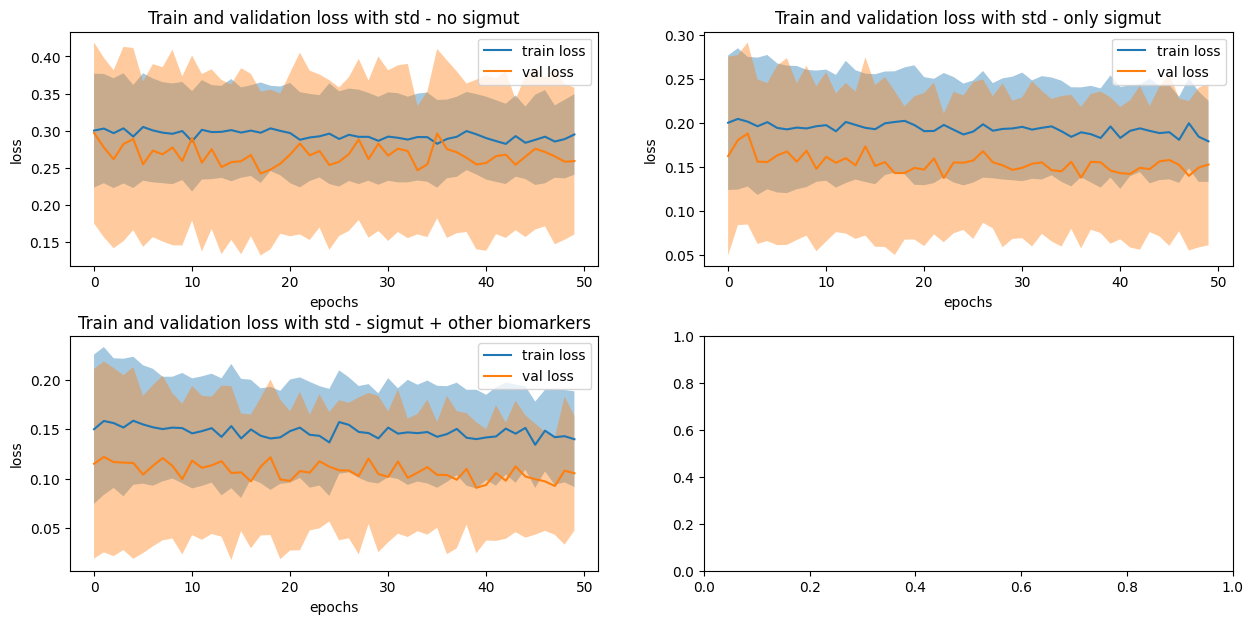

In [18]:
epochs = [k for k in range(n_epochs)]

fig, ax = plt.subplots(2,2,figsize=(15,7))

# No sigmut :
ax[0,0].plot(epochs, train_loss_no_sigmut,label='train loss')
ax[0,0].fill_between(epochs, train_loss_no_sigmut-std_train_loss_no_sigmut, train_loss_no_sigmut+std_train_loss_no_sigmut, alpha=0.4)
ax[0,0].plot(epochs, val_loss_no_sigmut,label='val loss')
ax[0,0].fill_between(epochs, val_loss_no_sigmut-std_val_loss_no_sigmut, val_loss_no_sigmut+std_val_loss_no_sigmut,alpha=0.4)
ax[0,0].set_xlabel('epochs')
ax[0,0].set_ylabel('loss')
ax[0,0].set_title('Train and validation loss with std - no sigmut')
ax[0,0].legend()

# Only sigmut :
ax[0,1].plot(epochs, train_loss_only_sigmut, label='train loss')
ax[0,1].fill_between(epochs, train_loss_only_sigmut-std_train_loss_only_sigmut, train_loss_only_sigmut+std_train_loss_only_sigmut, alpha=0.4)
ax[0,1].plot(epochs, val_loss_only_sigmut,label='val loss')
ax[0,1].fill_between(epochs, val_loss_only_sigmut-std_val_loss_only_sigmut, val_loss_only_sigmut+std_val_loss_only_sigmut,alpha=0.4)
ax[0,1].set_xlabel('epochs')
ax[0,1].set_ylabel('loss')
ax[0,1].set_title('Train and validation loss with std - only sigmut')
ax[0,1].legend()

# Sigmut + other biomarkers :
ax[1,0].plot(epochs, train_loss_comb, label='train loss')
ax[1,0].fill_between(epochs, train_loss_comb-std_train_loss_comb, train_loss_comb+std_train_loss_comb, alpha=0.4)
ax[1,0].plot(epochs, val_loss_comb,label='val loss')
ax[1,0].fill_between(epochs, val_loss_comb-std_val_loss_comb, val_loss_comb+std_val_loss_comb,alpha=0.4)
ax[1,0].set_xlabel('epochs')
ax[1,0].set_ylabel('loss')
ax[1,0].set_title('Train and validation loss with std - sigmut + other biomarkers')
ax[1,0].legend()

plt.subplots_adjust(hspace=0.3)

### Plot weights

In [19]:
# Take the absolute value
weights_conv = np.absolute(np.mean(params_conv_comb[0].detach().numpy(),axis=1))
weights_linear = np.absolute(params_fc_comb[0].detach().numpy())[0]

Text(0.5, 1.0, 'FC weights - sigmut + other biomarkers')

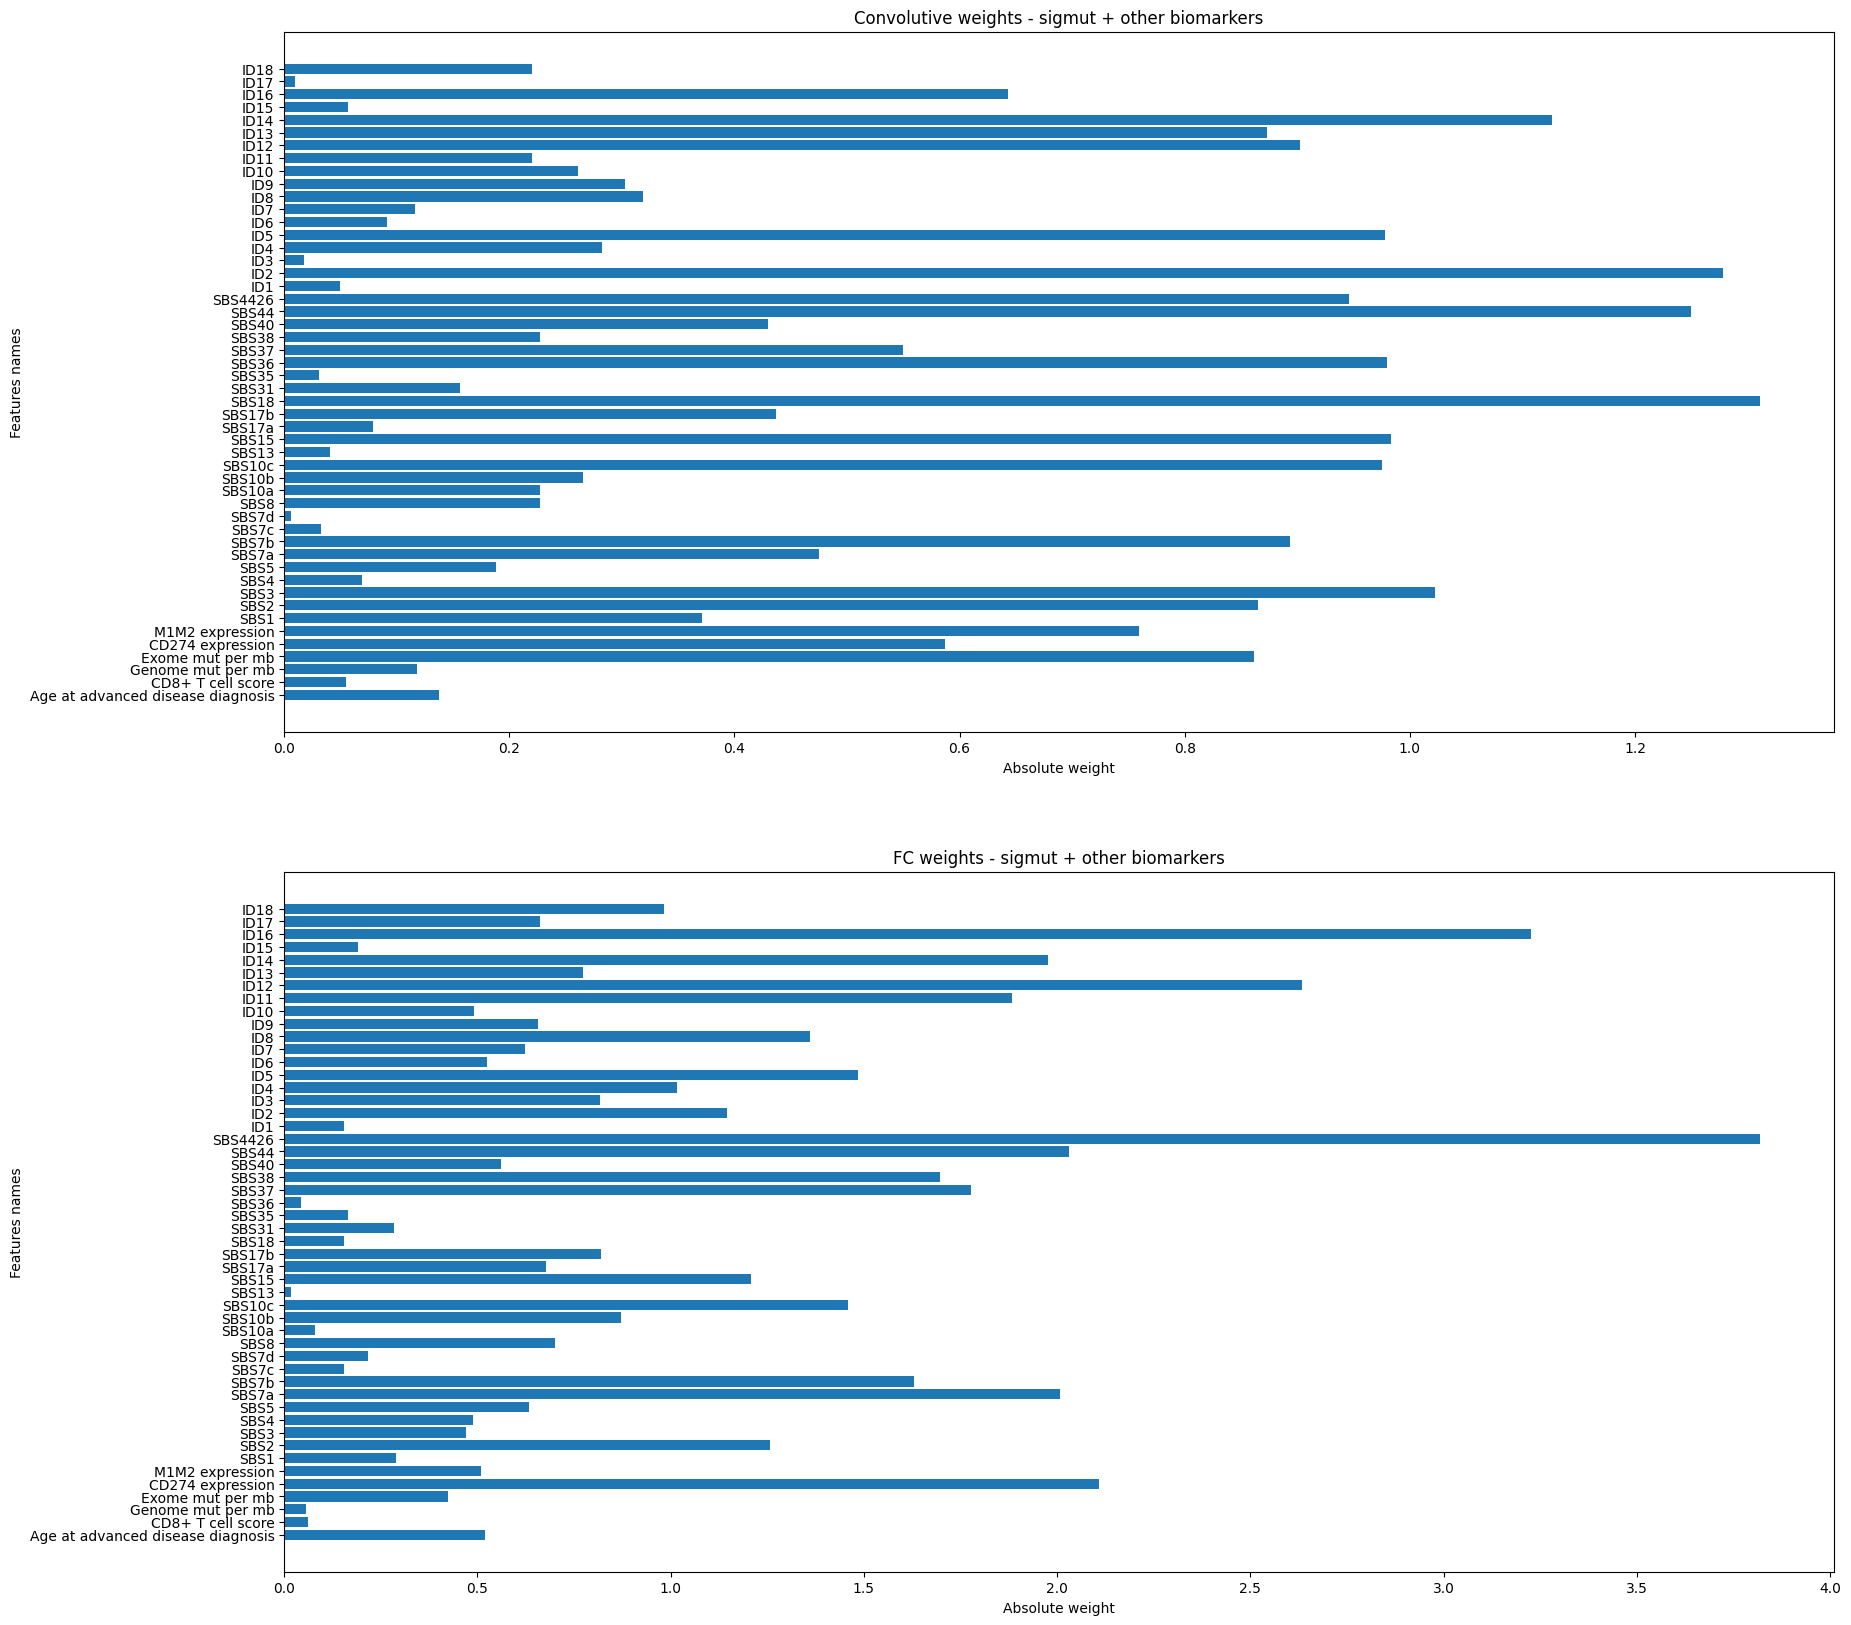

In [20]:
fig, ax = plt.subplots(2,1,figsize=(20,20))

ax[0].barh(features_name_comb,weights_conv)
ax[0].set_ylabel("Features names")
ax[0].set_xlabel("Absolute weight")
ax[0].set_title("Convolutive weights - sigmut + other biomarkers")

ax[1].barh(features_name_comb,weights_linear)
ax[1].set_ylabel("Features names")
ax[1].set_xlabel("Absolute weight")
ax[1].set_title("FC weights - sigmut + other biomarkers")